# World Happiness Analysis

## Context & Content
The happiness scores and rankings are based on answers to the main life evaluation question asked in the poll. This question asks respondents to think of a ladder with the *best possible life for them being a 10* and the *worst possible life being a 0* and to rate their own current lives on that scale.

The columns following the happiness score estimate the extent to which each of **six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity** – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Problem Statement
Knowing from the sample dataset (2016) listing the happiness scores of representatives in each country and the factors that contribute to these scores, how accurate can we predict the happiness scores of each country in 2017?

In [57]:
# Importing libraries for data analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Importing the dataset
# 2016
dataset2016 = pd.read_csv('dataset/2016.csv')
X_2016 = dataset2016.iloc[:, :-1].values
y_2016 = dataset2016.iloc[:, 8].values

In [60]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_2016[:, 0] = labelencoder.fit_transform(X_2016[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_2016 = onehotencoder.fit_transform(X_2016).toarray()

# Avoiding the Dummy Variable Trap
X_2016 = X_2016[:, 1:]

In [61]:
# Splitting the dataset into the Training set and Test set
X_2016_train, X_2016_test, y_2016_train, y_2016_test = train_test_split(X_2016, y_2016, test_size = 0.2, random_state = 0)

We will make use of 3 different methods to create regression models, to find out the most accurate model to act as the final model for the prediction of happiness score for the year 2017.

#### Regression Models
- Multiple Linear Regression
- Decision Tree
- Artificial Neural Network
- Random Forest Regression

### Multiple Linear Regression

In [62]:
# MODEL 1: Making use of Multiple Linear Regression


**Multiple Linear Regression**: Compute the root mean squared error (% accuracy) between the predicted value and the actual value.

In [42]:
# MODEL 1: Making use of Multiple Linear Regression (RMSE)
# rms = sqrt(mean_squared_error(y_actual, y_pred))

### Decision Tree Regression

In [10]:
# MODEL 2: Making use of Decision Trees Regression

#Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_2016_train,y_2016_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

[3.763 5.897 3.724 5.123 4.513 7.119 7.413 6.701 5.145 4.219 6.778 6.488
 6.474 4.871 5.835 4.362 7.087 4.795 5.401 5.835 7.334 5.291 3.303 6.725
 7.526 5.771 5.389 4.575 4.574 5.538 5.822]
[3.866 6.355 4.459 4.121 4.459 7.291 7.509 6.65  5.488 4.201 6.068 5.768
 5.615 5.161 5.648 4.813 6.355 4.508 5.743 5.977 6.573 5.161 3.36  6.907
 7.509 5.517 5.488 4.813 4.236 5.185 5.743]


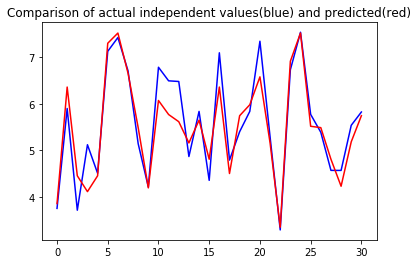

In [40]:
#Using model to predict based on test values
y_2016_pred_dtr = dt_regressor.predict(X_2016_test)
print(y_2016_test)
print(y_2016_pred)

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_dtr, color='red')
plt.title('Comparison of actual independent values(blue) and predicted(red)')
plt.show()

In [63]:
#Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_2016), max(X_2016), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_2016, y_2016, color = 'red')
plt.plot(X_grid, dt_regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Decision Tree Regression**: Compute the root mean squared error (% accuracy) between the predicted value and the actual value.

In [41]:
# MODEL 2: Making use of Decision Trees Regression (RMSE)
rms_dtr = sqrt(mean_squared_error(y_2016_test, y_2016_pred_dtr))
print(rms_dtr)

0.4315688559423105


### Artificial Neural Networks

In [ ]:
# MODEL 3: Making use of Artificial Neural Networks


**Artificial Neural Networks**: Compute the root mean squared error (% accuracy) between the predicted value and the actual value.

In [ ]:
# MODEL 3: Making use of Artificial Neural Networks (RMSE)
# rms = sqrt(mean_squared_error(y_actual, y_predicted))

### Random Forest Regression

In [34]:
# MODEL 3: Making use of Random Forests Regression

#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_2016_test, y_2016_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

[3.763 5.897 3.724 5.123 4.513 7.119 7.413 6.701 5.145 4.219 6.778 6.488
 6.474 4.871 5.835 4.362 7.087 4.795 5.401 5.835 7.334 5.291 3.303 6.725
 7.526 5.771 5.389 4.575 4.574 5.538 5.822]
[4.03   5.7263 3.9518 5.4705 4.4975 7.1015 7.4311 6.5038 5.1509 4.3806
 6.4806 6.7275 6.0086 4.944  5.4824 4.5286 6.9219 4.7165 5.3501 5.6432
 7.224  5.4941 3.6555 6.7801 7.4458 6.0364 5.4142 4.6645 4.6872 5.647
 5.5444]


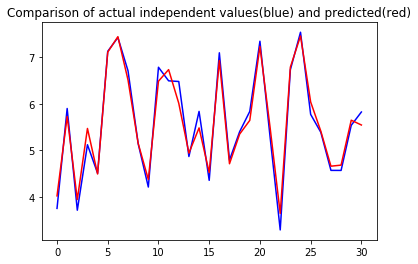

In [35]:
#Using model to predict based on test values
y_2016_pred_rfr = rf_regressor.predict(X_2016_test)
print(y_2016_test)
print(y_2016_pred_rfr)

plt.plot(y_2016_test, color='blue')
plt.plot(y_2016_pred_rfr, color='red')
plt.title('Comparison of actual independent values(blue) and predicted(red)')
plt.show()

**Random Forest Regression**: Compute the root mean squared error (% accuracy) between the predicted value and the actual value.

In [38]:
# MODEL 3: Making use of Random Forest Regression (RMSE)
rms_rfr = sqrt(mean_squared_error(y_2016_test, y_2016_pred_rfr))
print(rms_rfr)

0.2047433531159466


## Conclusion
The most accurate model that can predict the happiness scores is the (____) model.

The final model will thus be this model, and will be used to predict the happiness scores for the 2017 dataset.

## Predicting 2017's Happiness Scores

In [51]:
# 2017
dataset2017 = pd.read_csv('dataset/2017.csv')
X_2017 = dataset2017.iloc[:, :-1].values
y_2017 = dataset2017.iloc[:, 8].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_2017[:, 0] = labelencoder.fit_transform(X_2017[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_2017 = onehotencoder.fit_transform(X_2017).toarray()

# Avoiding the Dummy Variable Trap
X_2017 = X_2017[:, 1:]

In [53]:
# Predicting the 2017 dataset results using the model
# y_pred = regressor.predict(X_2016_test)